# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files averaged over three month periods.



## Calculation

In [1]:
%matplotlib inline

import cosima_cookbook as cc

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

netcdf_index loaded.


In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/g/data1/v45/cosima-cookbook/'", use "location=None" instead.
  app.launch_new_instance()


In [3]:
cc.start_cluster(diagnostics_port=8787)

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 8787:127.0.0.1:8787 vdi-n10.nci.org.au -l aek156


Client Scheduler: tcp://127.0.0.1:33100 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


What experiments have transport data saved?

At what temporal resolutions?

In [4]:
import sqlite3
conn = sqlite3.connect(cc.netcdf_index.database_file)
df = pd.read_sql("SELECT DISTINCT configuration, experiment, "
                 "       basename_pattern, "
                 "       count(run) "
                 "FROM ncfiles "
                 "WHERE variable LIKE 'tx_trans' "
                 "GROUP BY experiment", conn)
df

,configuration,experiment,basename_pattern,count(run)
0,access-om2-01,01deg_jra55v13_ryf8485_spinup1,ocean.nc,1
1,access-om2-01,01deg_jra55v13_ryf8485_spinup2,ocean.nc,2
2,access-om2-01,01deg_jra55v13_ryf8485_spinup3,ocean.nc,10
3,access-om2-01,01deg_jra55v13_ryf8485_spinup4,ocean.nc,8
4,access-om2-01,01deg_jra55v13_ryf8485_spinup5,ocean.nc,10
5,access-om2-01,01deg_jra55v13_ryf8485_spinup6,ocean.nc,412
6,access-om2-01,01deg_jra55v13_ryf8485_spinup6_dragio_0,ocean.nc,1
7,access-om2-01,01deg_jra55v13_ryf8485_spinup6_dt_720,ocean.nc,1
8,access-om2-01,01deg_jra55v13_ryf8485_spinup6_tripole_bug,ocean.nc,1
9,access-om2-025,025deg_jra55_ryf_broadwell_test,ocean.nc,33


In [5]:
straights = { 'DrakePassage': [-69.9, -69.9, -71.6, -51.0],
              'Lombok':       [-244.6+360, -243.9+360, -8.6, -8.6],
              'Ombai' :       [-235.0+360, -235.0+360, -9.2, -8.1],
              'Timor' :       [-235.9+360, -235.9+360, -11.9, -9.9],
              'Bering' :      [-172, -167, 65.8, 65.8],
              'Denmark' :     [-42, -22, 65.8, 65.8],
            }

In [6]:
xu_ocean = cc.get_nc_variable('KDS75', 
                           'ocean_grid.nc', 
                           'xu_ocean', n=1)
yu_ocean = cc.get_nc_variable('KDS75', 
                           'ocean_grid.nc', 
                           'yu_ocean', n=1)

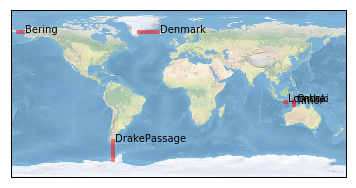

In [7]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

for straight, (xmin, xmax, ymin, ymax) in straights.items():

    plt.plot([xmin, xmax], [ymin, ymax],
            color='red', linewidth=4, alpha=0.5,
             transform=ccrs.Geodetic() )
   
    plt.annotate(xy=(xmin, ymin), xycoords='data',
                 xytext=(xmax+2, ymax),
                 s=straight,
               #  arrowprops=dict(facecolor='black', shrink=0.05),
                 transform=ccrs.Geodetic(),
                clip_on=True)

#ax.set_global()
#plt.annotate(xy=(0, 0), s='origin', transform=ccrs.Geodetic())
#plt.show()


In [8]:
@memory.cache
def calc_transport(expt, straight, n=24):
    """
    Calculate barotropic transport across a given 
     line of latitude or longitude.
     
    Designed for flow through straits.
    """
    
    print('Calculating {}:{} transport'.format(expt, straight))
    
    xmin, xmax, ymin, ymax = straights[straight]
    
    if xmin == xmax:                
        tx_trans = cc.get_nc_variable(expt, 
                                'ocean.nc', 
                                'tx_trans',
                                 chunks={'st_ocean':None},
                                 n=n)
        
        transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('st_ocean').sum('yt_ocean')

    elif ymin == ymax:
        ty_trans = cc.get_nc_variable(expt, 
                                      'ocean.nc', 
                                      'ty_trans',
                                      chunks={'st_ocean':None},
                                      n=n)
        transport = ty_trans.sel(yu_ocean=ymin, method='nearest')\
                            .sel(xt_ocean=slice(xmin, xmax))\
                            .sum('st_ocean').sum('xt_ocean')
    else:
        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
    
    transport = transport.compute()
       
    return transport

In [9]:
%%time
transport = calc_transport.func('KDS75', 'DrakePassage')

Calculating KDS75:DrakePassage transport


CPU times: user 17 s, sys: 9.49 s, total: 26.5 s
Wall time: 37.7 s


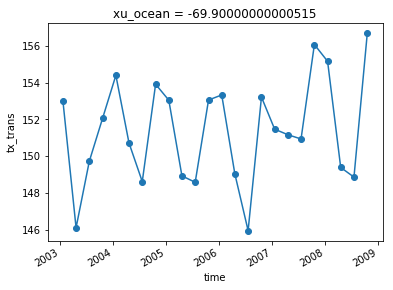

In [10]:
transport.plot(linestyle='-', marker='o')

There is an annual cycle in the transport. We want to take to take annual averages.

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="A").mean('time') 
  from ipykernel import kernelapp as app


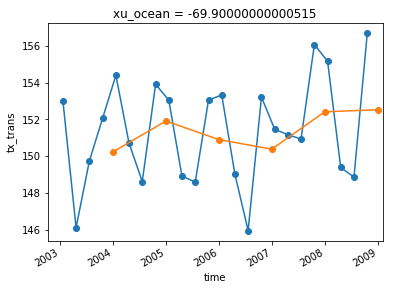

In [11]:
transport.plot(marker='o')
transport.resample('A', 'time').plot(marker='o')

When distributing a computing with dask, you should try and minimize the number of task while
keeping each task appropriate to a single work regarding memory usage.  We can vary the size
of the chunks to acheive this balance.

In [12]:
expts = cc.get_experiments('mom01v5')[:4]
expts

['GFDL50', 'KDS75', 'KDS75_PI', 'KDS75_UP']

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="A").mean('time') 
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes current

<bound method Figure.tight_layout of <Figure size 864x720 with 6 Axes>>

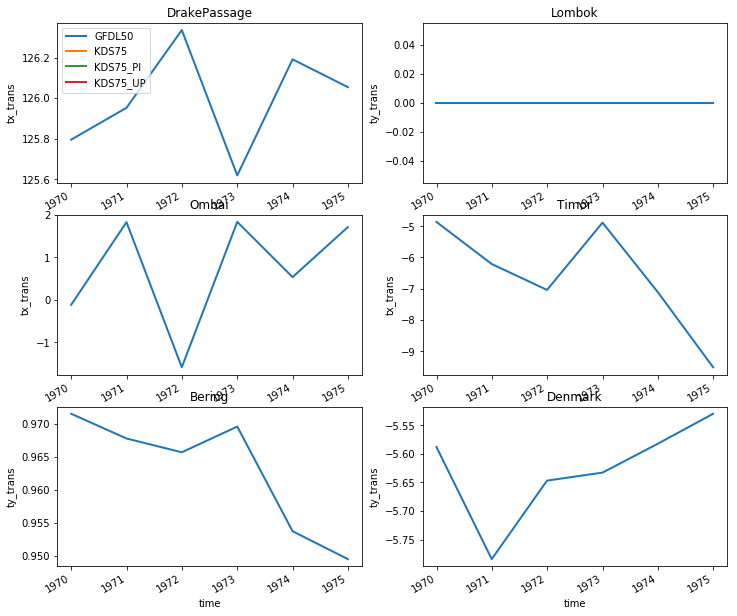

In [15]:
fig = plt.figure(figsize=(12,10))

for expt in expts:  
    for nplot, straight in enumerate(straights):
       
        transport = calc_transport(expt, straight)
        transport = transport.resample('A', 'time')
        
        plt.subplot(3, 2, nplot+1)
        transport.plot(label=expt, linewidth=2)
        plt.title( straight)
        
plt.subplot(321)
plt.legend(loc='upper left')
#plt.ylabel('Transport (Sv)')
plt.xlabel('')
plt.subplot(322)
#plt.ylabel('')
plt.xlabel('')
plt.subplot(323)
#plt.ylabel('Transport (Sv)')
plt.xlabel('')
plt.subplot(324)
#plt.ylabel('')
plt.xlabel('')
plt.subplot(325)
#plt.ylabel('Transport (Sv)')
#plt.xlabel('Time')
plt.subplot(326)
#plt.ylabel('')
#plt.xlabel('Time')
fig.tight_layout